# Libraries

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Import Dataset

In [32]:
df = pd.read_csv('winequality-red.csv', delimiter=';')
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

# First insight of dataset

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [34]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

# EDA

## Feature Distribution

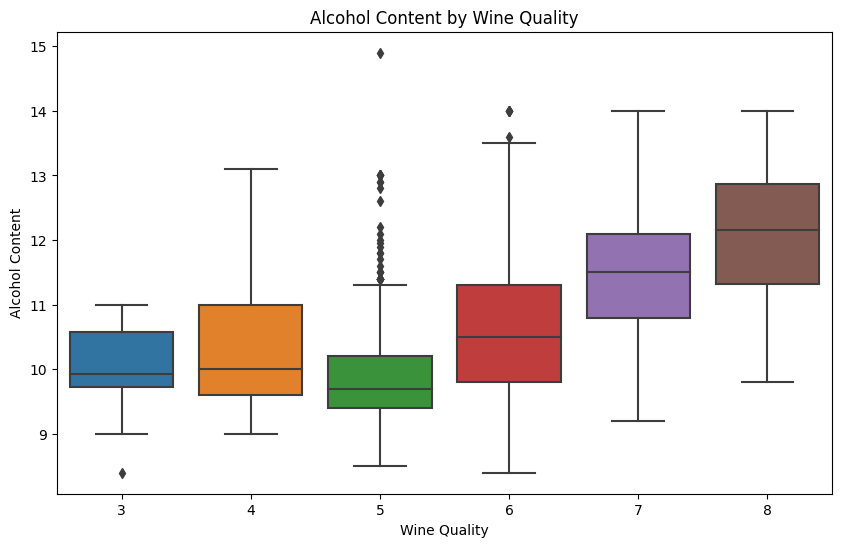

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', data=df)
plt.xlabel('Wine Quality')
plt.ylabel('Alcohol Content')
plt.title('Alcohol Content by Wine Quality')
plt.show()

## Hist chart for numerical features

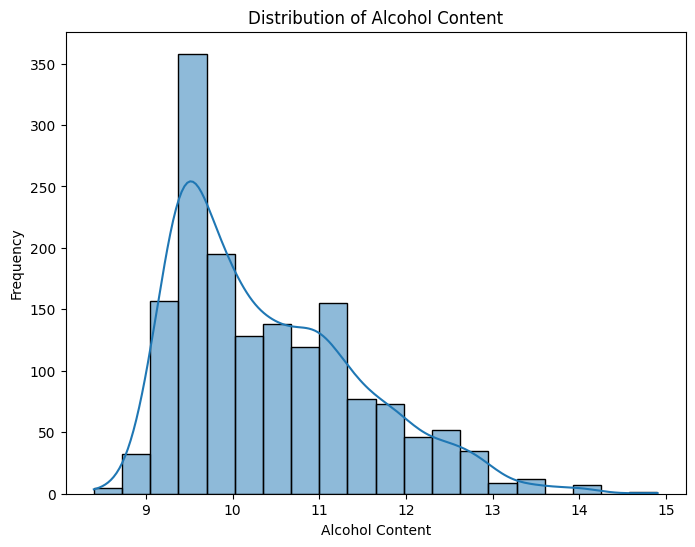

In [36]:
plt.figure(figsize=(8, 6))
sns.histplot(df['alcohol'], bins=20, kde=True)
plt.xlabel('Alcohol Content')
plt.ylabel('Frequency')
plt.title('Distribution of Alcohol Content')
plt.show()

## Correlation Matirx

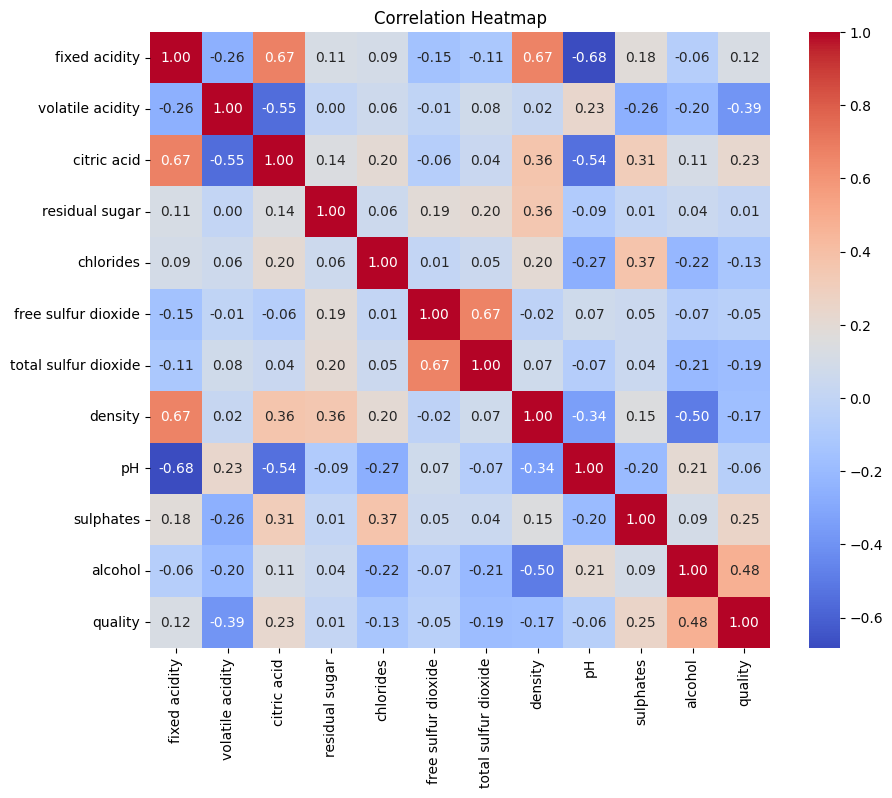

In [37]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Statistical Analysis

## Summary Statistical

In [38]:
summary_stats = df.describe()
print("Summary Statistics for Numerical Features:")
print(summary_stats)

Summary Statistics for Numerical Features:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min  

### Distribution of the target variables using summary statistics

Count: There are 1599 observations in the dataset, meaning there are 1599 samples of wine quality data.

Mean: The mean (average) wine quality in the dataset is approximately 5.636, indicating that, on average, the wines in the dataset have a quality score around 5.6.

Standard Deviation (Std): The standard deviation is approximately 0.807, which measures the spread or variability of wine quality scores around the mean. A higher standard deviation suggests more variability in wine quality scores.

Minimum (Min): The minimum wine quality score in the dataset is 3.0, which represents the lowest quality rating in the dataset.

25th Percentile (Q1): The 25th percentile (first quartile) wine quality score is approximately 5.0. This means that 25% of the wines in the dataset have a quality score of 5 or lower.

Median (50th Percentile): The median (middle value when the data is sorted) wine quality score is approximately 6.0. This is the value that separates the higher half from the lower half of the quality scores.

75th Percentile (Q3): The 75th percentile (third quartile) wine quality score is approximately 6.0. This means that 75% of the wines in the dataset have a quality score of 6 or lower.

Maximum (Max): The maximum wine quality score in the dataset is 8.0, which represents the highest quality rating in the dataset. in the dataset.

## median stats

In [39]:
median_stats = df.median()
print("Median for Numerical Features:")
print(median_stats)

Median for Numerical Features:
fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.07900
free sulfur dioxide     14.00000
total sulfur dioxide    38.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
quality                  6.00000
dtype: float64


# calculate mode for each numerical column

In [40]:
mode_stats = df.mode().iloc[0]
print("Mode for Numerical Features:")
print(mode_stats)

Mode for Numerical Features:
fixed acidity            7.2000
volatile acidity         0.6000
citric acid              0.0000
residual sugar           2.0000
chlorides                0.0800
free sulfur dioxide      6.0000
total sulfur dioxide    28.0000
density                  0.9972
pH                       3.3000
sulphates                0.6000
alcohol                  9.5000
quality                  5.0000
Name: 0, dtype: float64


# Variance of numerical column

In [41]:
# Calculate the variance for each numerical column
variance_stats = df.var()
print("\nVariance for Numerical Features:")
print(variance_stats)


Variance for Numerical Features:
fixed acidity              3.031416
volatile acidity           0.032062
citric acid                0.037947
residual sugar             1.987897
chlorides                  0.002215
free sulfur dioxide      109.414884
total sulfur dioxide    1082.102373
density                    0.000004
pH                         0.023835
sulphates                  0.028733
alcohol                    1.135647
quality                    0.652168
dtype: float64


## Correlation matrix

In [42]:
# Calculate the correlation matrix
correlation_matrix = df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide 

### In depth Analysis of Correlation Matrixe quality.ith higher wine quality.ated with higher wine quality.

***Fixed Acidity***: This feature has a positive correlation with Citric Acid (0.671703) and Density (0.668047), indicating that as fixed acidity increases, citric acid and density also tend to increase. It has a negative correlation with pH (-0.682978), indicating that as fixed acidity increases, pH tends to decrease.    

***Volatile Acidity***: It has a strong negative correlation with Citric Acid (-0.552496), suggesting that as volatile acidity increases, citric acid tends to decrease. It also has a negative correlation with Quality (-0.390558), meaning that higher volatile acidity is associated with lower wine quality.    

***Citric Acid***: It has a positive correlation with Fixed Acidity (0.671703), Density (0.364947), and Quality (0.226373). Higher citric acid is associated with higher fixed acidity, density, and wine quality.    

***Residual Sugar***: It has a positive correlation with Free Sulfur Dioxide (0.187049) and Total Sulfur Dioxide (0.203028).  

***Chlorides***: It has a positive correlation with Sulphates (0.371260) and a negative correlation with Alcohol (-0.221141).   

***Free Sulfur Dioxide***: It has a positive correlation with Total Sulfur Dioxide (0.667666).    

***Total Sulfur Dioxide***: It has a negative correlation with Alcohol (-0.205654) and Density (0.071269).    

***Density***: It has a negative correlation with Fixed Acidity (-0.113181), Citric Acid (-0.541904), and pH (-0.341699).    

***pH***: It has a negative correlation with Fixed Acidity (-0.682978) and a positive correlation with Volatile Acidity (0.234937).    

***Sulphates***: It has a positive correlation with Chlorides (0.371260) and Quality (0.251397).    

***Alcohol***: It has a positive correlation with Quality (0.476166) and a negative correlation with Density (-0.496180).     

***Quality***: It has a positive correlation with Alcohol (0.476166), indicating that higher alcohol content is associated with higher wine quality.  

# Visualization

## histograms or density plots for each numerical feature to visualize their distributions

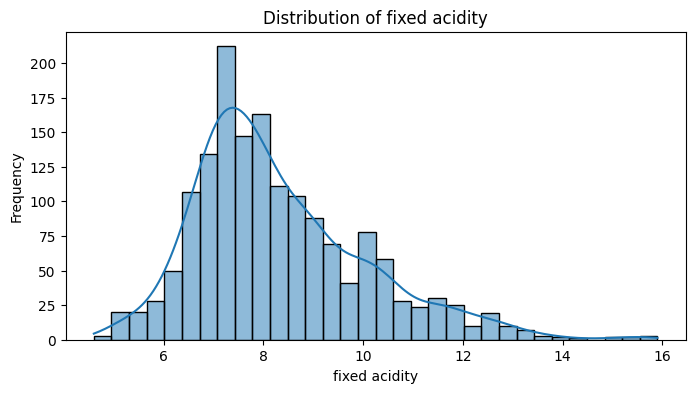

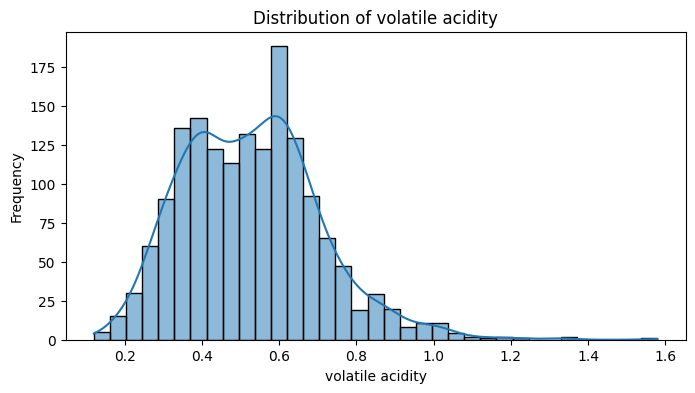

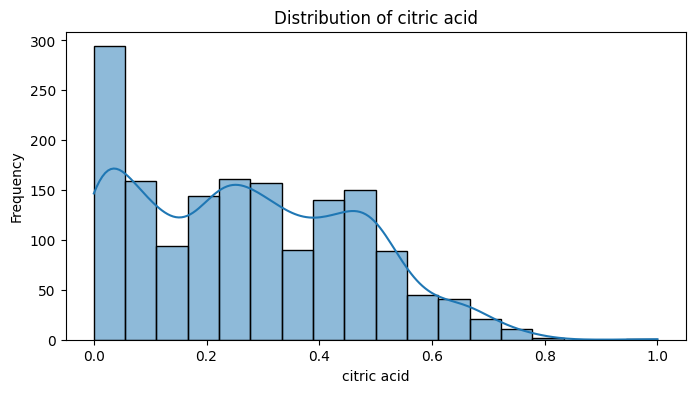

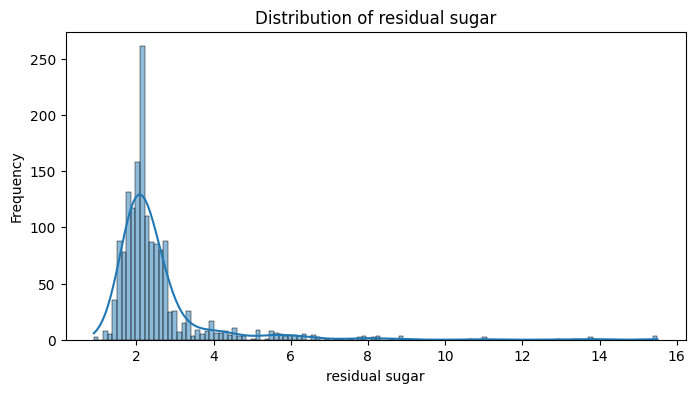

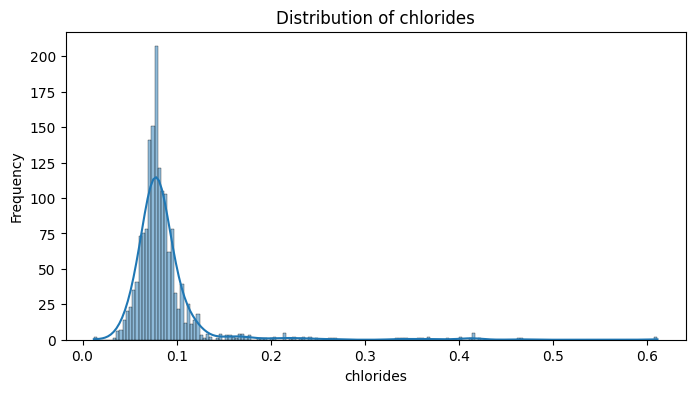

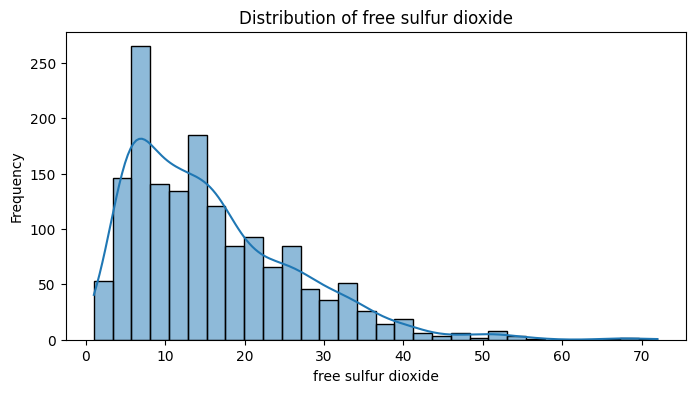

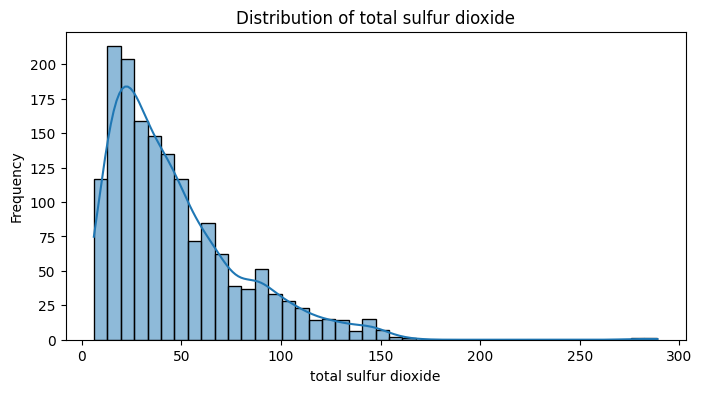

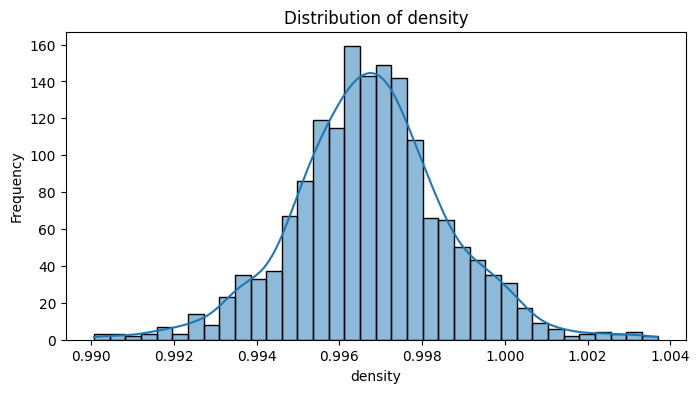

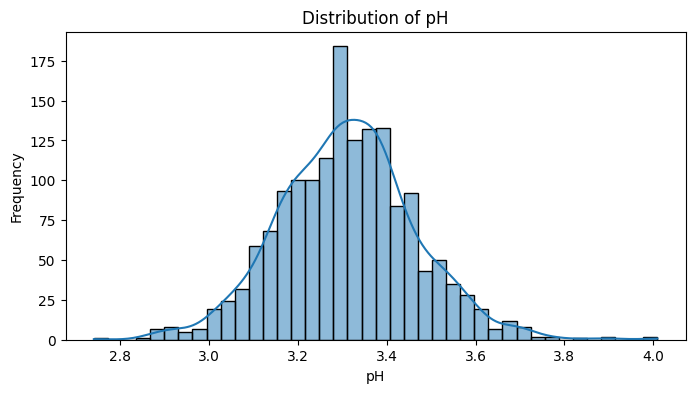

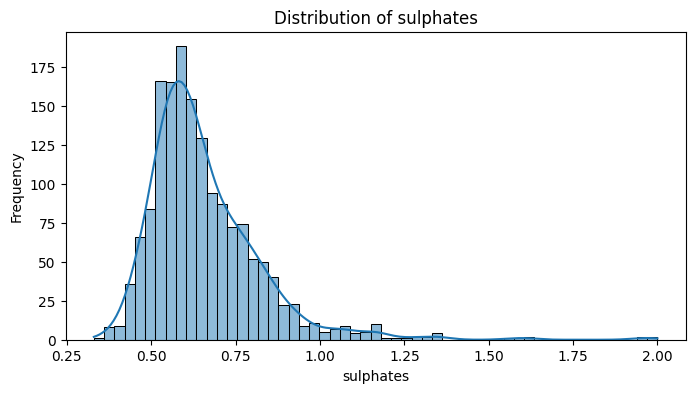

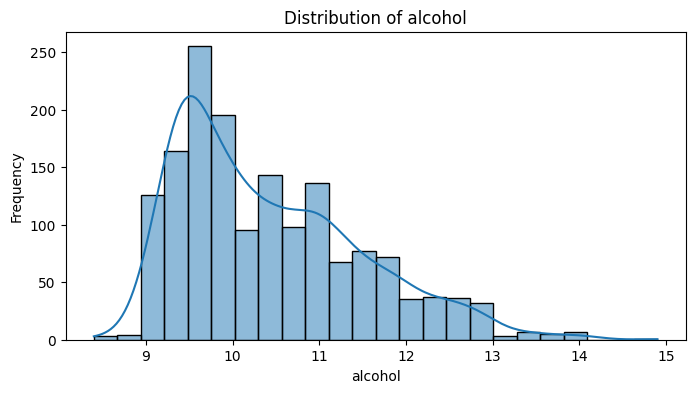

In [44]:
columns_to_visualize = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

for column in columns_to_visualize:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

##  box plots to identify outliers and visualize feature distributions:

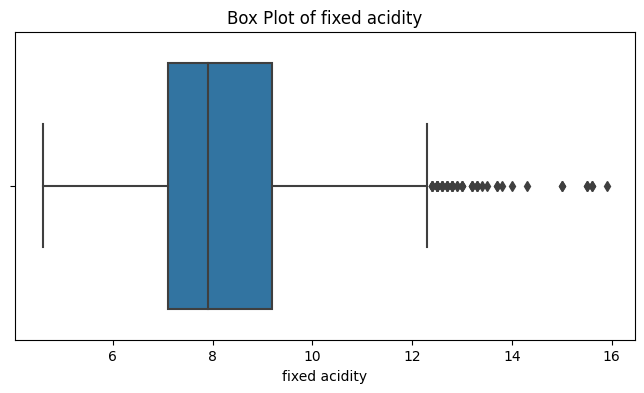

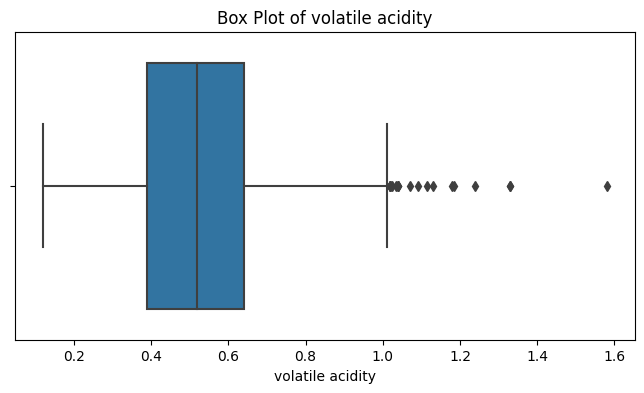

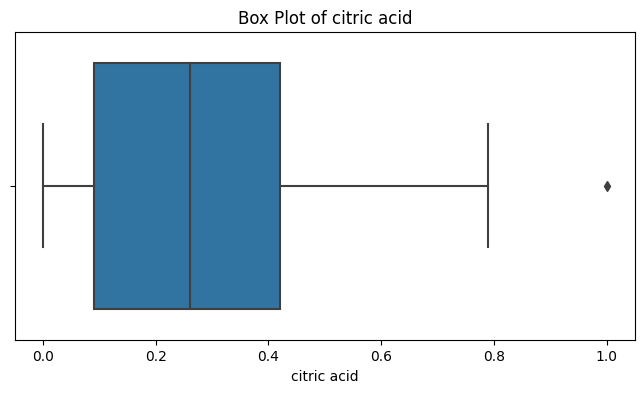

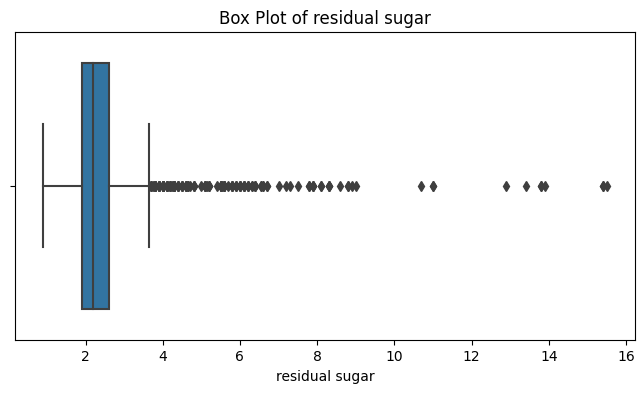

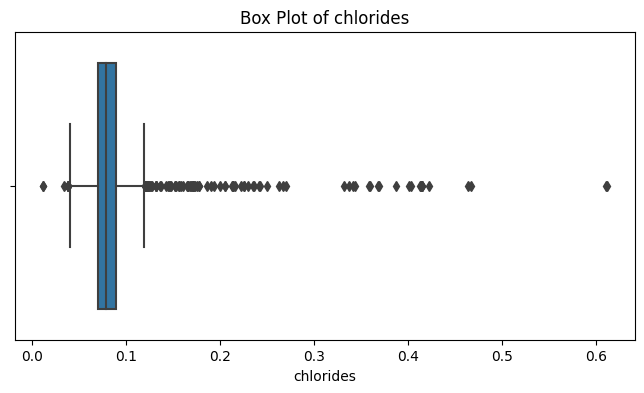

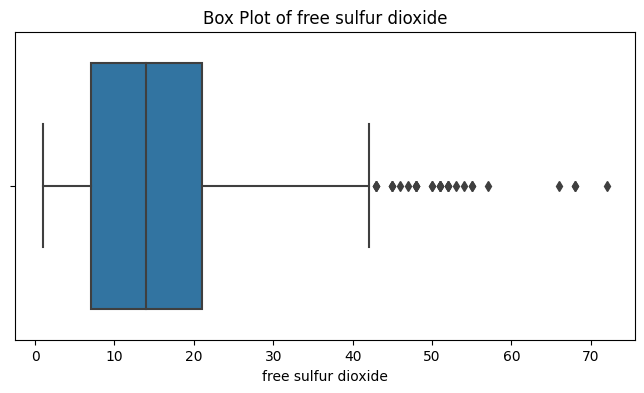

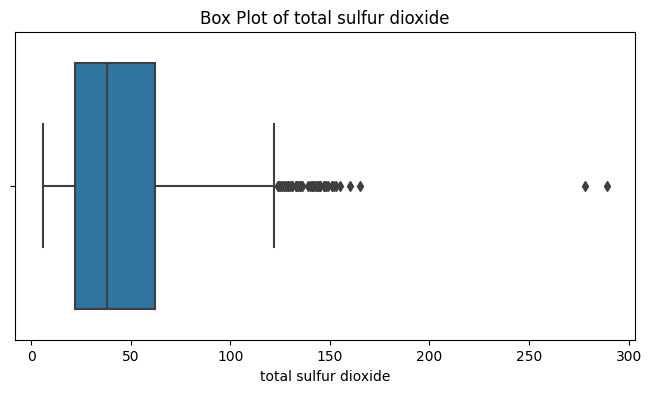

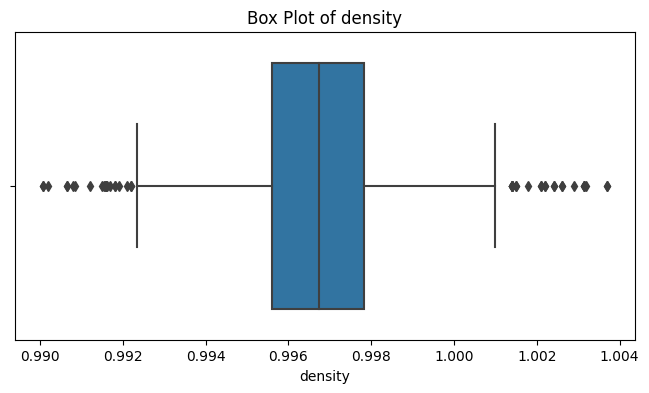

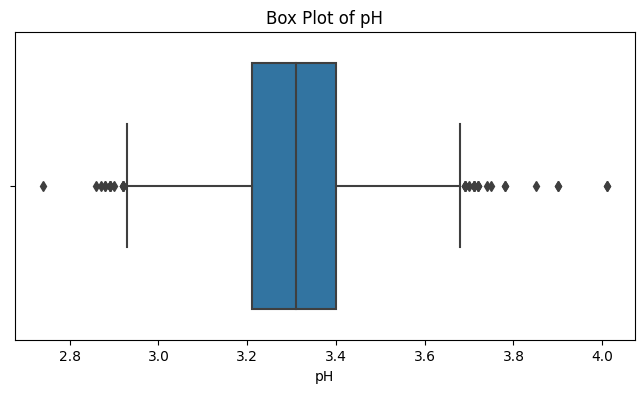

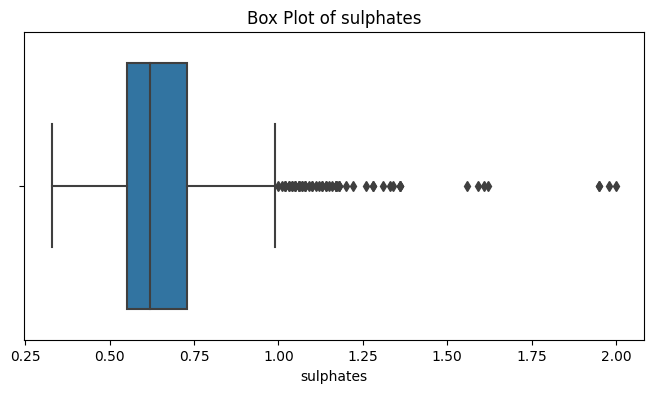

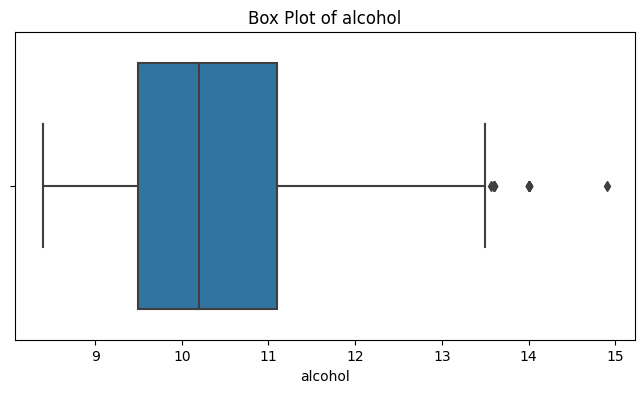

In [45]:
for column in columns_to_visualize:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()


### Plot bar charts or count plots to visualize the distribution of wine quality ratings:

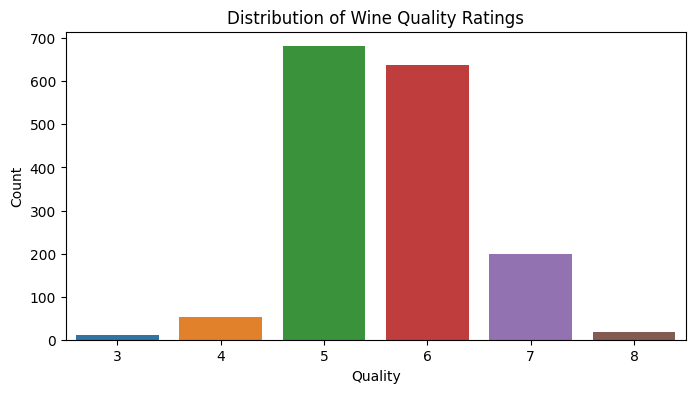

In [47]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='quality')
plt.title('Distribution of Wine Quality Ratings')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

### pairwise relationships between features using scatter plots and color them by wine quality

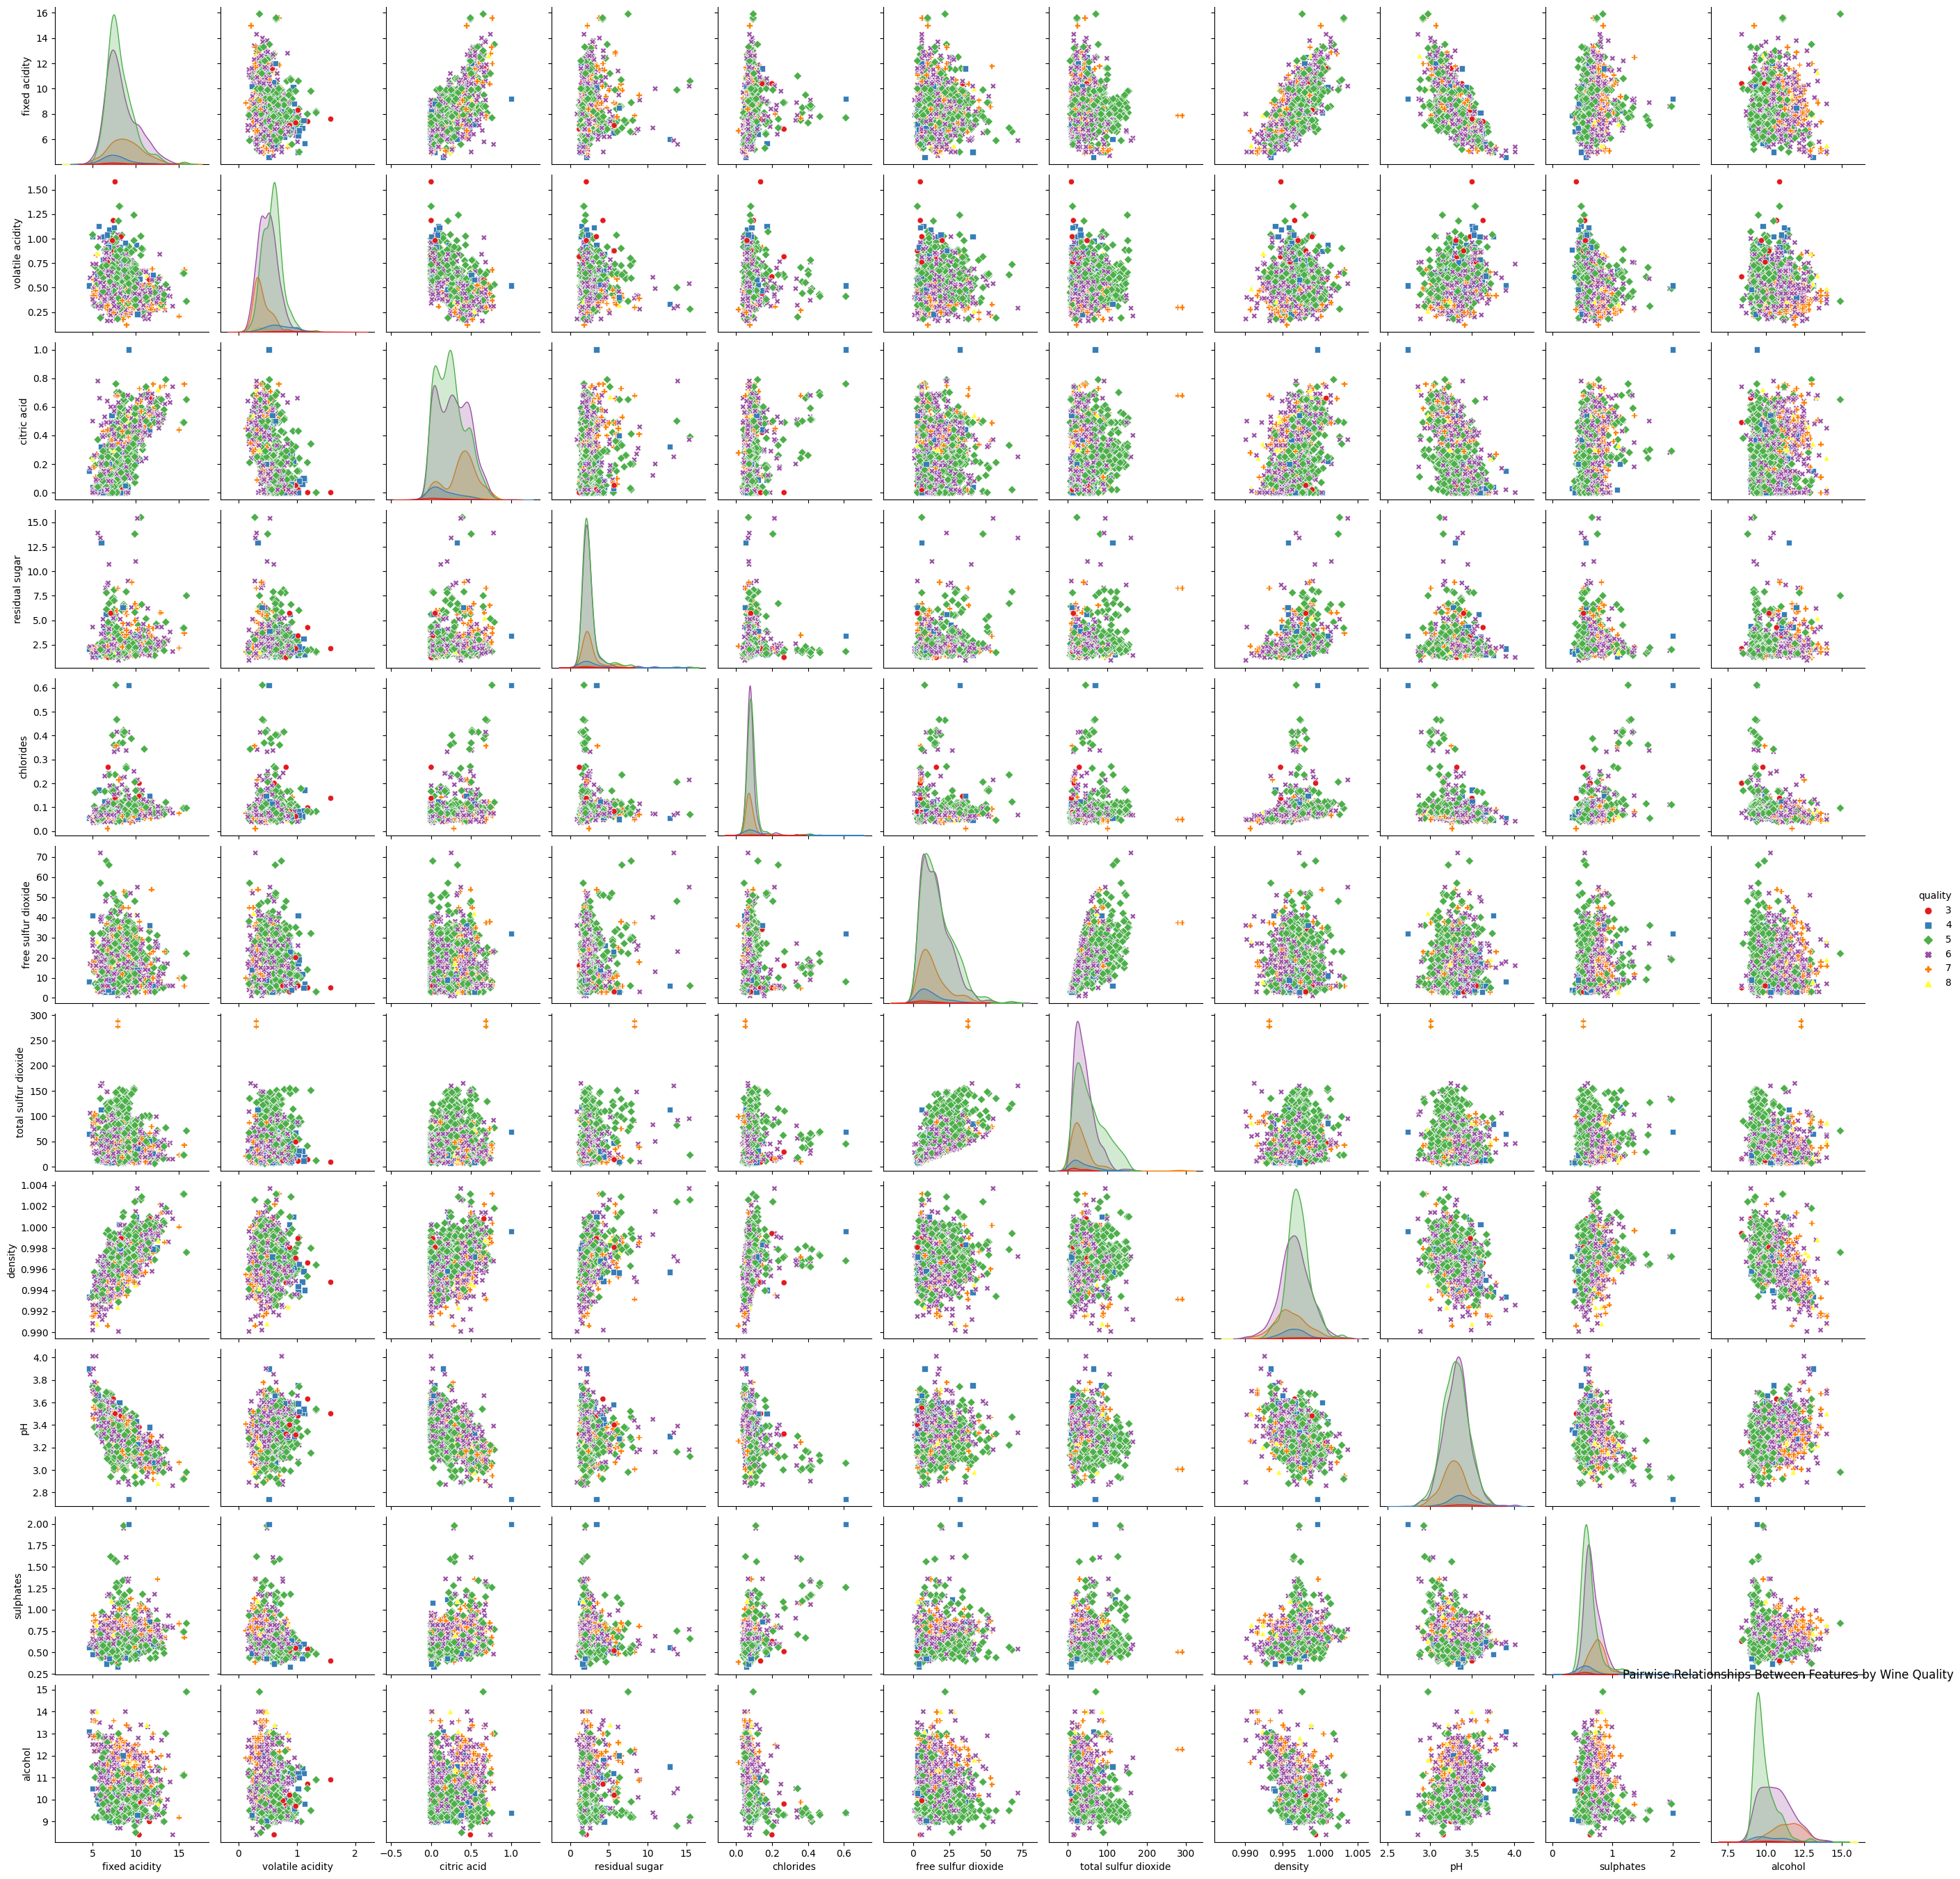

In [49]:
sns.pairplot(data=df, hue='quality', markers=["o", "s", "D", "X", "P", "^"], palette="Set1")
plt.title('Pairwise Relationships Between Features by Wine Quality')
plt.show()

# Rename columns

In [69]:
df.columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

# hypotheses test

### quality ~ fixed_acidity

In [71]:
formula = 'quality ~ C(fixed_acidity)'

# Fit the OLS model
model = ols(formula, data=df).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

# Check for significant differences
alpha = 0.05
p_value = anova_table['PR(>F)'][0]

if p_value < alpha:
    print(f'There are significant differences in wine quality based on fixed acidity (p-value = {p_value}).')
else:
    print(f'There are no significant differences in wine quality based on fixed acidity (p-value = {p_value}).')

                      sum_sq      df         F        PR(>F)
C(fixed_acidity)  117.709763    95.0  2.014475  8.010185e-08
Residual          924.455340  1503.0       NaN           NaN
There are significant differences in wine quality based on fixed acidity (p-value = 8.010184881566455e-08).


### quality ~ residual sugar

In [75]:
formula = 'quality ~ C(residual_sugar)'

# Fit the OLS model
model = ols(formula, data=df).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

# Check for significant differences
alpha = 0.05
p_value = anova_table['PR(>F)'][0]

if p_value < alpha:
    print(f'There are significant differences in wine quality based on residual sugar (p-value = {p_value}).')
else:
    print(f'There are no significant differences in wine quality based on residual sugar (p-value = {p_value}).')

                       sum_sq      df        F        PR(>F)
C(residual_sugar)  112.135489    90.0  2.02025  1.378601e-07
Residual           930.029615  1508.0      NaN           NaN
There are significant differences in wine quality based on residual sugar (p-value = 1.3786007424599954e-07).


### quality ~ pH

In [76]:
formula = 'quality ~ C(pH)'

# Fit the OLS model
model = ols(formula, data=df).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

# Check for significant differences
alpha = 0.05
p_value = anova_table['PR(>F)'][0]

if p_value < alpha:
    print(f'There are significant differences in wine quality based on pH (p-value = {p_value}).')
else:
    print(f'There are no significant differences in wine quality based on pH (p-value = {p_value}).')

              sum_sq      df         F    PR(>F)
C(pH)      83.888186    88.0  1.502118  0.002304
Residual  958.276917  1510.0       NaN       NaN
There are significant differences in wine quality based on pH (p-value = 0.002304346879718688).
